In [40]:
import numpy as mp
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Importação do arquivo em excel
df1 = pd.read_excel("dados.xlsx", encoding = "UTF-8") 

df1 = df1.T.reset_index().rename(columns={"index":"mês"})
d1 = df1.shift(-1)
d1

,mês,0,1
0,Mes_1,janeiro,240
1,Mes_2,fevereiro,280
2,Mes_3,março,200
3,Mes_4,abril,310
4,Mes_5,maio,230
5,Mes_6,junho,213
6,Mes_7,julho,239
7,Mes_8,agosto,210
8,Mes_9,setembro,210
9,Mes_10,outubro,210


In [41]:
d1 = d1.loc[0:11]
d1

,mês,0,1
0,Mes_1,janeiro,240
1,Mes_2,fevereiro,280
2,Mes_3,março,200
3,Mes_4,abril,310
4,Mes_5,maio,230
5,Mes_6,junho,213
6,Mes_7,julho,239
7,Mes_8,agosto,210
8,Mes_9,setembro,210
9,Mes_10,outubro,210


In [42]:
d1.columns

Index(['mês', 0, 1], dtype='object')

In [43]:
d1.rename(columns={'mês':'index', 0 :'mês', 1 :'realizado'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [44]:
d1.columns

Index(['index', 'mês', 'realizado'], dtype='object')

In [45]:
d2 = pd.read_excel("dados.xlsx", "orcado")
d2.head(3)

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230


In [46]:
d3 = pd.merge(d1, d2, on="mês", how="outer")
d3.head(3)

,index,mês,realizado,orcado
0,Mes_1,janeiro,240,330
1,Mes_2,fevereiro,280,290
2,Mes_3,março,200,230


In [47]:
type(d3.realizado)

pandas.core.series.Series

In [48]:
type(d3.orcado)

pandas.core.series.Series

In [0]:
d3['diferenca'] = d3['orcado'] - d3['realizado']

In [0]:
d4 = d3[["mês", "orcado", "realizado", "diferenca"]]

In [51]:
d4

,mês,orcado,realizado,diferenca
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


In [52]:
d4.to_dense().to_csv('dados-saida.csv', sep=';', index=False, encoding='utf-8-sig')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
bar1 = np.arange(0, 81, 10)
print((bar1))

[ 0 10 20 30 40 50 60 70 80]


In [55]:
bar1 = np.arange(0, 81, 10)
print((bar1))

[ 0 10 20 30 40 50 60 70 80]


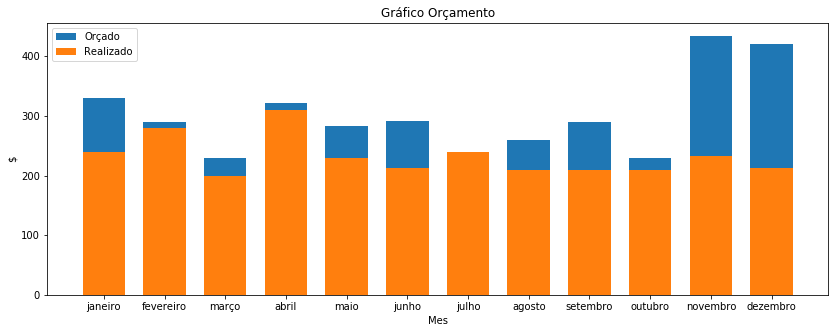

In [56]:
fig = plt.figure(figsize=(14,5))

N = 12
ListProfit = d4['diferenca']
ListDone = d4['realizado']
#difference = d4['diferenca']

ind = np.arange(N)
width = 0.7  

#plt.figure().set_figwidth(25)
p1 = plt.bar(ind, ListProfit, width, bottom=ListDone, label='Orçado')
p2 = plt.bar(ind, ListDone, width, label='Realizado')
plt.legend((p1[0], p2[0]), ('Orçado', 'Realizado'))

plt.xlabel('Mes')
plt.ylabel('$')
plt.title('Gráfico Orçamento')
plt.xticks(ind, d4['mês'])
plt.yticks(np.arange(0, 450, 100))

plt.legend()

plt.savefig('graficoAnalitico.png', dpi=100)

plt.show()